# RAMP: Picture reconstruction
*Alexia Allal, Gabriel Buffet, Stéphane Dumas, Nicolas Giraudet de Boudemange, Sébastien Mandela Yvon, Jérémy Pinault from IPP/M2DS*

<div>
<table style="width:100%; background-color:white;">
  <tr style="background-color:white;">
    <td align="left"; style="background-color:white; width: 100%;">
        <a href="https://www.ip-paris.fr/">
            <img src="https://www.ip-paris.fr/voeux2022-telecomparis/images/logos_ecoles.png" width="1000px"/>
        </a>
    </td>
  </tr>
 </table>
</div>


## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Setup](#setup)
  * [Prerequisites](#prerequisites)
* [Data exploration](#exploration)
  * [Data download](#download)
  * [Visualize data](#visualize)
* [Solutions](#solutions)
  * [A dummy solution](#dummy)
  * [A simple solution](#simple)
* [Score](#score)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>

The Unsplash Dataset is made up of over 350,000+ contributing global photographers and data sourced from hundreds of millions of searches across a nearly unlimited number of uses and contexts. Due to the breadth of intent and semantics contained within the Unsplash dataset, it enables new opportunities for research and learning.

The Unsplash Dataset is offered in two datasets:

* the Lite dataset: available for commercial and noncommercial usage, containing 25k nature-themed Unsplash photos, 25k keywords, and 1M searches
* the Full dataset: available for noncommercial usage, containing 5.4M+ high-quality Unsplash photos, 5M keywords, and over 250M searches

As the Unsplash library continues to grow, we’ll release updates to the dataset with new fields and new images, with each subsequent release being [semantically versioned](https://semver.org/).

For more on the Unsplash Dataset, see the [announcement](https://unsplash.com/blog/the-unsplash-dataset/) and [site](https://unsplash.com/data).

To create this challenge, we use the Lite dataset and we downgrade the quality of the images.
The goal of our challenge is to reconstruct the original pictures.

## The dataset <a class="anchor" id="dataset"></a>

In the Dataset, you will find the original picture (the ground truth) that you must to reconstruct with a low resolution version of this image.

The low resolution image has been obtained with a simple downsampling by a factor of 5 in each spatial dimension and conversion to black & white.

For example, if the original picture has a shape of (800, 640, 3) (Height, Width, Channels), you will be provided with a low resolution version of the orginial picture with a shape (160, 128, 3).

The Public Dataset you get access contains 15 000 pictures.

## Setup <a class="anchor" id="setup"></a>

### Prerequisites <a class="anchor" id="prerequisites"></a>
The following cell will install the required package dependencies, if necessary. You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.


In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt


## Data exploration <a class="anchor" id="exploration"></a>

### Data download <a class="anchor" id="download"></a>

Data are avaialable on a public drive that we can retrieve with the download_data script

In [5]:
# Uncomment the following line to download data:
import download_data
download_data.data_load()

Data loading


Retrieving folder contents


Processing file 1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ data.tgz


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ
From (redirected): https://drive.google.com/uc?id=1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ&confirm=t&uuid=bd127e2d-9b61-4eff-9f49-1be917e0aaca
To: /Users/sdumas/Documents/MASTER_DS/Data_Camp/ZZ_Data_challenge_group/Git/picture_reconstruction/data/data.tgz
100%|██████████| 185M/185M [00:05<00:00, 34.8MB/s] 
Download completed


Unzip completed


We can now load the images data that are directly prepared in numpy arrays. We have 5000 images in he train set and 1000 images in the test set

In [6]:
data_repo = 'data/public/'
X_train = np.load(data_repo + 'Xtrain.npy') / 255
Y_train = np.load(data_repo + 'Ytrain.npy') / 255
X_test = np.load(data_repo + 'Xtest.npy') / 255
Y_test = np.load(data_repo + 'Ytest.npy') / 255
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5000, 64, 64), (5000, 128, 128), (1000, 64, 64), (1000, 128, 128))

### Visualize data <a class="anchor" id="visualize"></a>

Now, we have the data loaded. We can visualize an original picture and its low-resolution version. All images are black and white for the challenge.

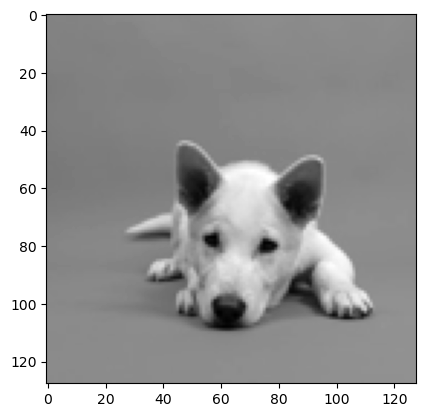

In [7]:
img_idx = 2503
img_hi=Y_train[img_idx]
imgplot = plt.imshow(img_hi, cmap='gray')

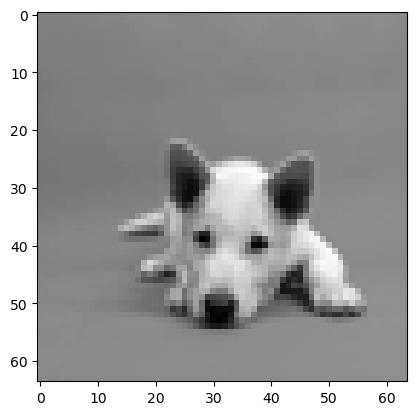

In [9]:
img_lo=X_train[img_idx]
imgplot = plt.imshow(X_train[img_idx], cmap='gray')

And a few other examples...

/var/folders/tq/lzmfptz96p1cptz796lf8jr40000gn/T/ipykernel_30000/2082270633.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i + 1)


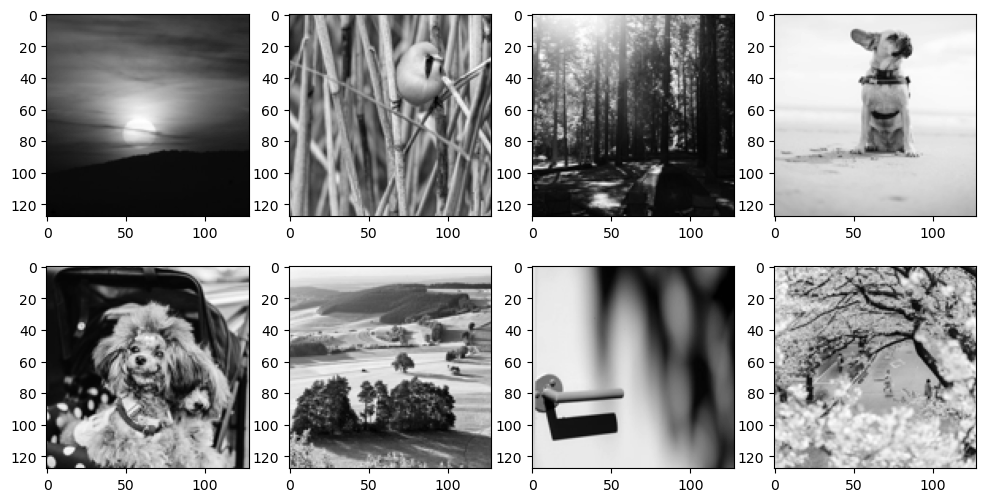

/var/folders/tq/lzmfptz96p1cptz796lf8jr40000gn/T/ipykernel_30000/2082270633.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, i + 1)


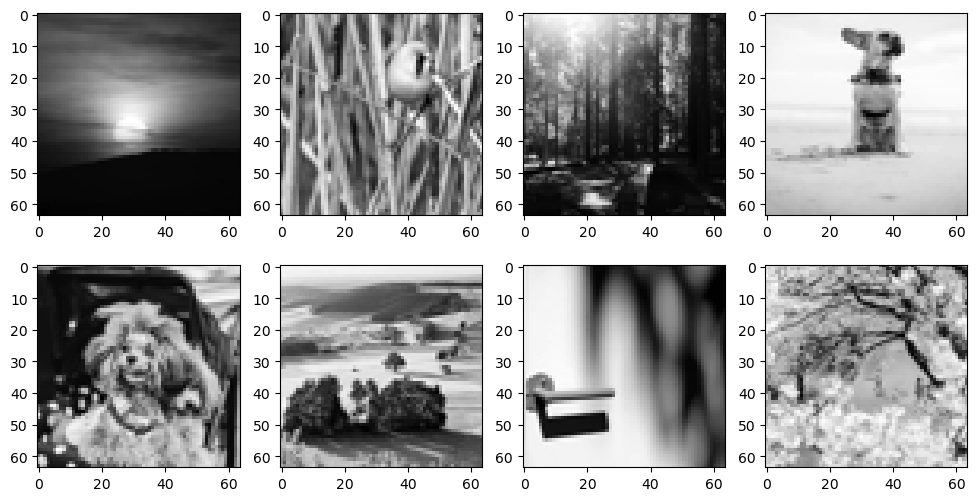

In [10]:
indices = np.random.randint(0, 128, 8)
plt.figure(figsize=(12, 6))
plt.title('Downsized and grayscaled Images')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(Y_train[idx], cmap='gray')
plt.show()

plt.figure(figsize=(12, 6))
plt.title('Real Images')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
plt.show()

As you can see, both pictures do not have the same resolution and therefore not the same shape:

In [11]:
print("image High Resolution shape: ", img_hi.shape)
print("image Low Resolution shape: ", img_lo.shape)


image High Resolution shape:  (128, 128)
image Low Resolution shape:  (64, 64)


## Solutions <a class="anchor" id="solutions"></a>

This section will show you two ideas of solutions to reconstruct the original images. The first one is the dummiest and the second one is a very simple reshaping of the low resolution image.

The starter kit has a sample estimator in submissions/starting_kit/. There, you'll find a file, estimator.py, which RAMP expects to have BaseEstimator defined. The class is intentionally barebones, and is a good starting place for your own estimators. You can use the sample estimator as a template for your own estimators.

The fitting methods, fit and fit_partial are related to fitting your estimator to the data.
- fit expects to be given the entirety of the data to fit. You won't be able to fit all the data in memory, and as such fit is not required.
- fit_partial behaves similarly, but instead assumes that not all data is being presented at once. It is used in iterative fitting (e.g. stochastic gradient descent). This method is required.

### A dummy solution <a class="anchor" id="dummy"></a>

(128, 128)


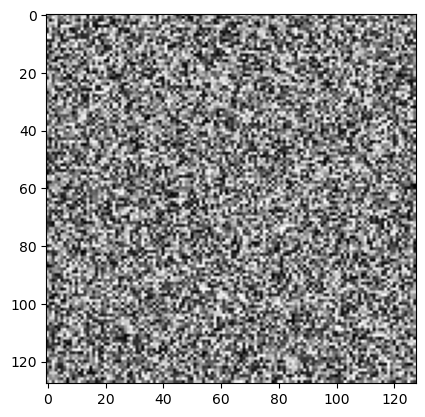

In [12]:
import numpy as np

img_random = np.random.randint(0, 255, size=img_hi.shape) / 255
print(img_random.shape)
imgplot = plt.imshow(img_random, cmap='gray')

### A simple solution  <a class="anchor" id="simple"></a>

We can quite easily reshape the image to come back to the original resolution


Shape of original image:  (128, 128)
Shape of reconstructed image:  (128, 128)


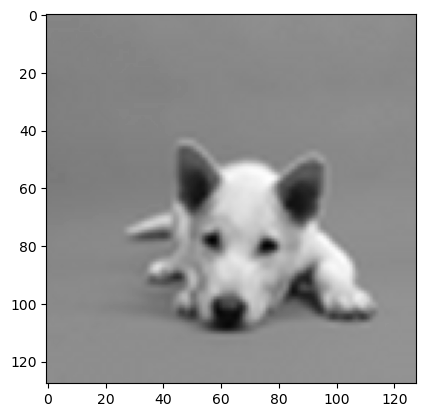

In [13]:
import scipy.ndimage


size_factor = img_hi.shape[0] / img_lo.shape[0]
img_reconstructed = scipy.ndimage.zoom(img_lo * 255, (size_factor, size_factor), order=3).astype(int) / 255
print("Shape of original image: ", img_hi.shape)
print("Shape of reconstructed image: ", img_reconstructed.shape)
imgplot = plt.imshow(img_reconstructed, cmap='gray')

This version will constitute the reference benchmark for the challenge

## Score <a class="anchor" id="score"></a>

We use the Root-Mean Squared Error (RMSE) between the original image and the reconstructed image to compute the reconstruction performance.

Here is a simple example of RMSE calculation.

In [14]:
rmse_random = np.sqrt(np.sum((img_random - img_hi)**2) / img_hi.size)
rmse_reconstructed = np.sqrt(np.sum((img_reconstructed - img_hi)**2) / img_hi.size)
print("rmse random image (dummy): ", rmse_random)
print("rmse reconstructed image (simple): ", rmse_reconstructed)


rmse random image (dummy):  0.3095264425873685
rmse reconstructed image (simple):  0.01743601680009323


The second score is the one to beat for the challenge (for this picture example)

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

<span style="color:red">A REPRENDRE A LA FIN</span>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [tephra](http://www.ramp.studio/events/tephra_datacamp2023). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [38]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class Classifier(BaseEstimator):
    def __init__(self):
        self.transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        self.model = LogisticRegression(max_iter=500)
        self.pipe = make_pipeline(self.transformer, self.model)

    def fit(self, X, y):
        X = X.drop(["groups"], axis=1)
        self.pipe.fit(X, y)

    def predict(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict(X)

    def predict_proba(self, X):
        X = X.drop(["groups"], axis=1)
        return self.pipe.predict_proba(X)

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [1]:
!ramp-test --submission starting_kit

zsh:1: command not found: ramp-test


## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the issue tracker.